# Análisis del efecto de las optimizaciones en el modelo que trabaja con datos de audio
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModel.tflite".
Model size 14.58984375 Kb
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


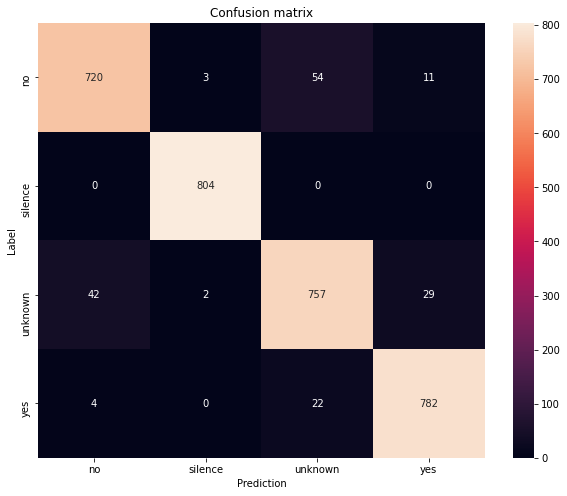

              precision    recall  f1-score   support

          no    0.93995   0.91371   0.92664       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95134   0.96782   0.95951       808

    accuracy                        0.94830      3230
   macro avg    0.94847   0.94839   0.94836      3230
weighted avg    0.94819   0.94830   0.94818      3230

Average time: 0.27602560379925895 ms
Max time: 1.4951229095458984 ms
Min time: 0.11110305786132812 ms
Using 452 samples.


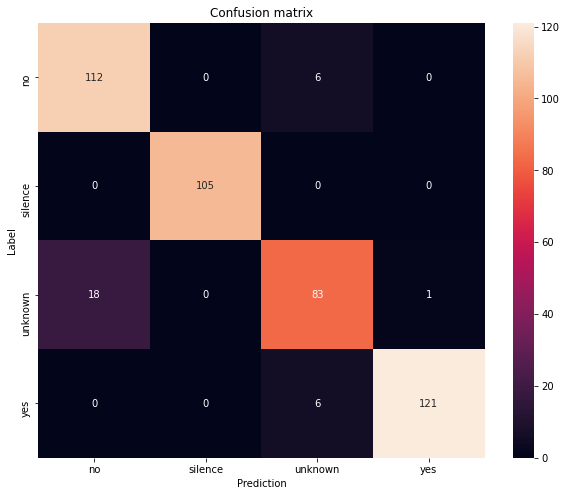

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.87368   0.81373   0.84264       102
         yes    0.99180   0.95276   0.97189       127

    accuracy                        0.93142       452
   macro avg    0.93176   0.92891   0.92944       452
weighted avg    0.93305   0.93142   0.93133       452

Average time: 0.25325591585277457 ms
Max time: 0.39839744567871094 ms
Min time: 0.11110305786132812 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path)

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQuant.tflite".
Model size 5.5546875 Kb
Using 3230 samples.


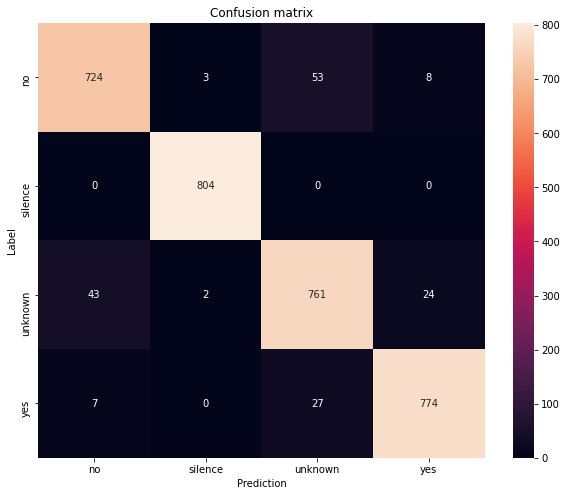

              precision    recall  f1-score   support

          no    0.93540   0.91878   0.92702       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90488   0.91687   0.91083       830
         yes    0.96030   0.95792   0.95911       808

    accuracy                        0.94830      3230
   macro avg    0.94860   0.94839   0.94846      3230
weighted avg    0.94833   0.94830   0.94828      3230

Average time: 1.531396045035253 ms
Max time: 21.070003509521484 ms
Min time: 0.6232261657714844 ms
Using 452 samples.


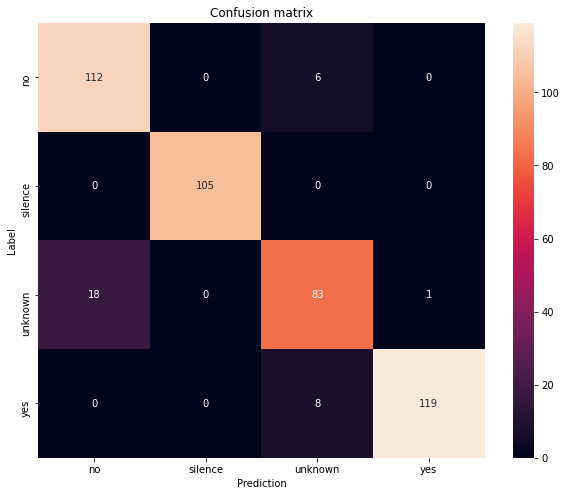

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.85567   0.81373   0.83417       102
         yes    0.99167   0.93701   0.96356       127

    accuracy                        0.92699       452
   macro avg    0.92722   0.92497   0.92524       452
weighted avg    0.92894   0.92699   0.92708       452

Average time: 1.4616467256461625 ms
Max time: 2.9942989349365234 ms
Min time: 0.6237030029296875 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test externa y
los datos captados con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQAT.tflite".
Model size 5.609375 Kb
Using 3230 samples.


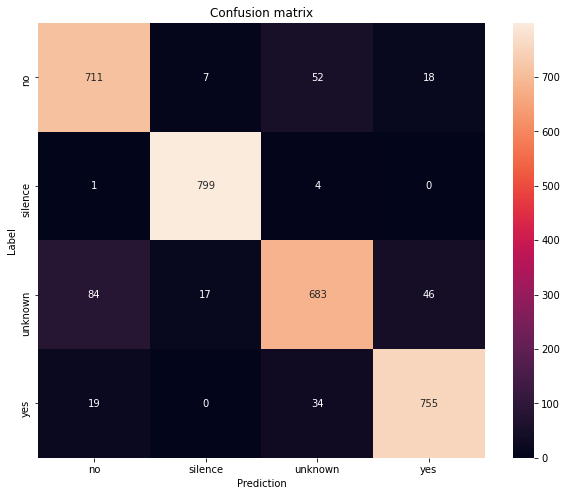

              precision    recall  f1-score   support

          no    0.87239   0.90228   0.88709       788
     silence    0.97084   0.99378   0.98218       804
     unknown    0.88357   0.82289   0.85215       830
         yes    0.92186   0.93441   0.92809       808

    accuracy                        0.91269      3230
   macro avg    0.91216   0.91334   0.91238      3230
weighted avg    0.91214   0.91269   0.91204      3230

Average time: 1.477919717322193 ms
Max time: 6.554365158081055 ms
Min time: 0.6258487701416016 ms
Using 452 samples.


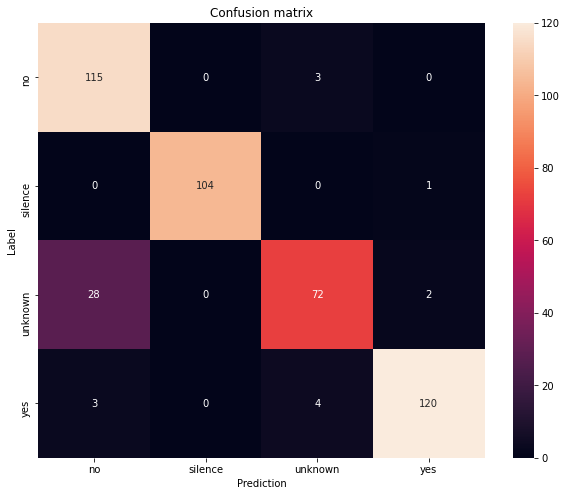

              precision    recall  f1-score   support

          no    0.78767   0.97458   0.87121       118
     silence    1.00000   0.99048   0.99522       105
     unknown    0.91139   0.70588   0.79558       102
         yes    0.97561   0.94488   0.96000       127

    accuracy                        0.90929       452
   macro avg    0.91867   0.90395   0.90550       452
weighted avg    0.91772   0.90929   0.90790       452

Average time: 1.4175851788141032 ms
Max time: 2.8243064880371094 ms
Min time: 0.6260871887207031 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

